In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download latest version of the 2018 dataset
path = kagglehub.dataset_download("yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018")

# Load only the 2018 dataset
df = pd.read_csv(f"{path}/2018.csv")

In [ ]:
# Display basic info
print(df.head())
print(df.info())

      FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0  2018-01-01         UA               2429    EWR  DEN          1517   
1  2018-01-01         UA               2427    LAS  SFO          1115   
2  2018-01-01         UA               2426    SNA  DEN          1335   
3  2018-01-01         UA               2425    RSW  ORD          1546   
4  2018-01-01         UA               2424    ORD  ALB           630   

   DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  CRS_ELAPSED_TIME  \
0    1512.0       -5.0      15.0      1527.0  ...             268.0   
1    1107.0       -8.0      11.0      1118.0  ...              99.0   
2    1330.0       -5.0      15.0      1345.0  ...             134.0   
3    1552.0        6.0      19.0      1611.0  ...             190.0   
4     650.0       20.0      13.0       703.0  ...             112.0   

   ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  \
0                250.0     225.0    1605.0            NaN 

<ipython-input-5-da67524239f9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_contributions.values, y=delay_contributions.index, palette="coolwarm")


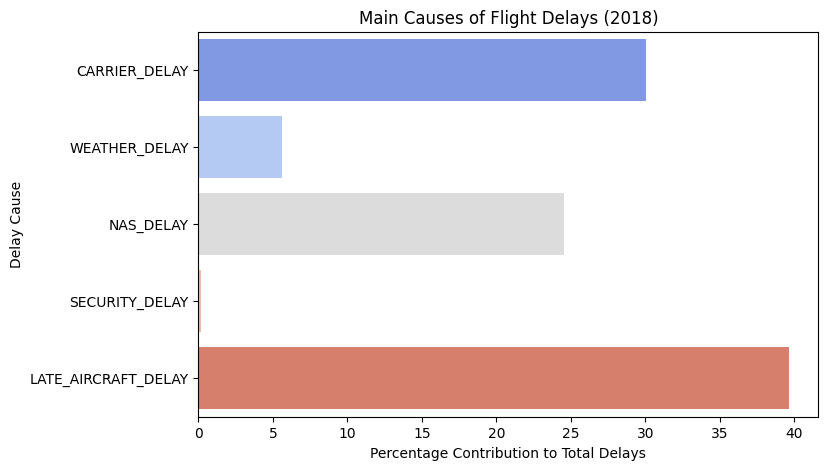

Percentage contribution of each delay factor:
CARRIER_DELAY          30.062779
WEATHER_DELAY           5.619226
NAS_DELAY              24.546968
SECURITY_DELAY          0.144541
LATE_AIRCRAFT_DELAY    39.626487
dtype: float64


In [ ]:
# Check for missing values in delay columns
delay_columns = ["CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]
df[delay_columns] = df[delay_columns].fillna(0)  # Replace NaNs with 0

# Create a total delay column
df["Total_Delay"] = df[delay_columns].sum(axis=1)

# Compute the percentage contribution of each delay type
delay_contributions = df[delay_columns].sum() / df["Total_Delay"].sum() * 100

# Plot the contribution of each delay cause
plt.figure(figsize=(8, 5))
sns.barplot(x=delay_contributions.values, y=delay_contributions.index, palette="coolwarm")
plt.xlabel("Percentage Contribution to Total Delays")
plt.ylabel("Delay Cause")
plt.title("Main Causes of Flight Delays (2018)")
plt.show()

# Print delay percentage breakdown
print("Percentage contribution of each delay factor:")
print(delay_contributions)


<ipython-input-6-e133c93a460c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_delays.index, y=airline_delays.values, palette="coolwarm")


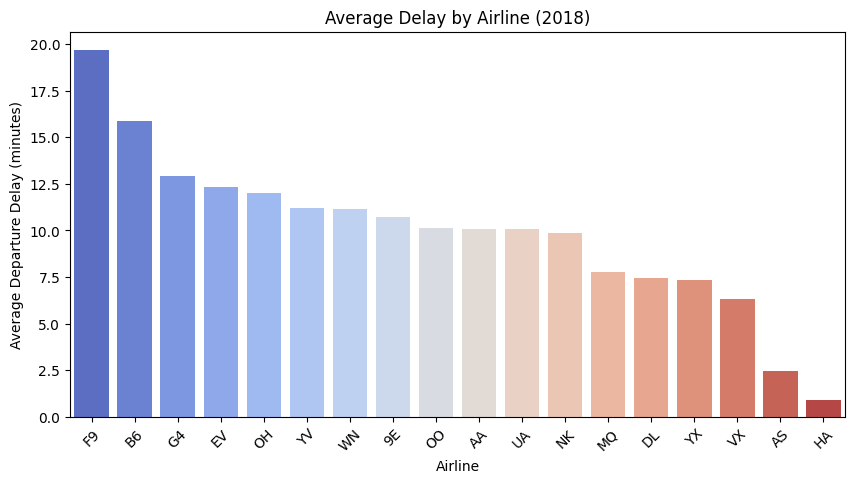

Average delay by airline:
OP_CARRIER
F9    19.684102
B6    15.869267
G4    12.922575
EV    12.319338
OH    12.038332
YV    11.226541
WN    11.138968
9E    10.732733
OO    10.112660
AA    10.078218
UA    10.060413
NK     9.868512
MQ     7.765102
DL     7.461923
YX     7.339655
VX     6.333836
AS     2.481820
HA     0.913099
Name: DEP_DELAY, dtype: float64


<ipython-input-6-e133c93a460c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airport_delays.index, y=airport_delays.values, palette="magma")


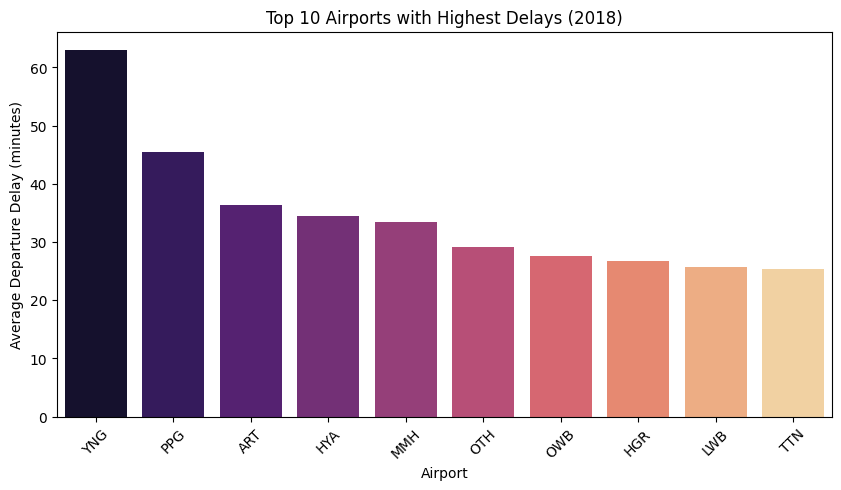

Top 10 airports with highest delays:
ORIGIN
YNG    63.000000
PPG    45.385246
ART    36.333333
HYA    34.397727
MMH    33.503704
OTH    29.173184
OWB    27.635514
HGR    26.760870
LWB    25.709220
TTN    25.308151
Name: DEP_DELAY, dtype: float64


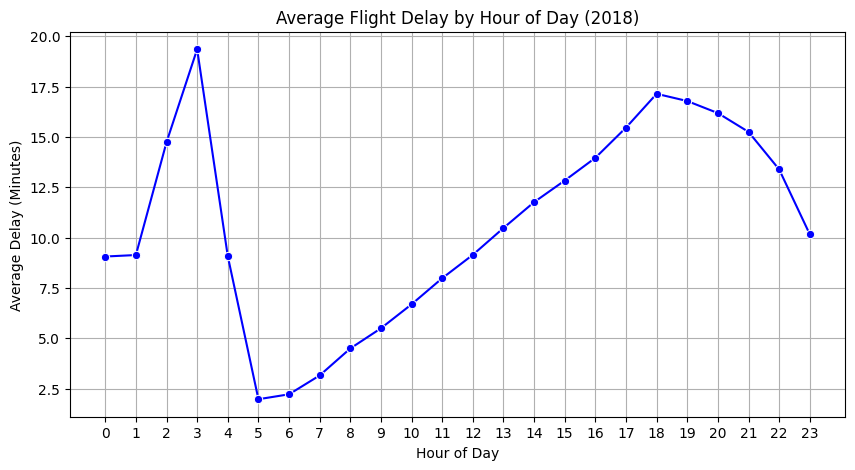

Average delay by hour of day:
HOUR
0      9.061147
1      9.134911
2     14.737968
3     19.357202
4      9.076503
5      1.973696
6      2.218363
7      3.155151
8      4.494998
9      5.496520
10     6.688020
11     7.983661
12     9.146342
13    10.477233
14    11.762363
15    12.835544
16    13.964310
17    15.463504
18    17.142496
19    16.783269
20    16.184745
21    15.250408
22    13.385745
23    10.163025
Name: DEP_DELAY, dtype: float64


In [ ]:
### 1. Delays by Airline ###
if 'OP_CARRIER' in df.columns:
    airline_delays = df.groupby('OP_CARRIER')['DEP_DELAY'].mean().sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=airline_delays.index, y=airline_delays.values, palette="coolwarm")
    plt.xlabel("Airline")
    plt.ylabel("Average Departure Delay (minutes)")
    plt.title("Average Delay by Airline (2018)")
    plt.xticks(rotation=45)
    plt.show()

    print("Average delay by airline:")
    print(airline_delays)

### 2. Delays by Airport ###
if 'ORIGIN' in df.columns:
    airport_delays = df.groupby('ORIGIN')['DEP_DELAY'].mean().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=airport_delays.index, y=airport_delays.values, palette="magma")
    plt.xlabel("Airport")
    plt.ylabel("Average Departure Delay (minutes)")
    plt.title("Top 10 Airports with Highest Delays (2018)")
    plt.xticks(rotation=45)
    plt.show()

    print("Top 10 airports with highest delays:")
    print(airport_delays)

### 3. Delays by Time of Day ###
if 'CRS_DEP_TIME' in df.columns:
    df['HOUR'] = df['CRS_DEP_TIME'] // 100  # Convert to hour format
    hourly_delays = df.groupby('HOUR')['DEP_DELAY'].mean()

    plt.figure(figsize=(10, 5))
    sns.lineplot(x=hourly_delays.index, y=hourly_delays.values, marker='o', linestyle='-', color='blue')
    plt.xlabel("Hour of Day")
    plt.ylabel("Average Delay (Minutes)")
    plt.title("Average Flight Delay by Hour of Day (2018)")
    plt.xticks(range(0, 24))
    plt.grid()
    plt.show()

    print("Average delay by hour of day:")
    print(hourly_delays)

Mean Absolute Error: 19.22 minutes


<ipython-input-12-1c64e4364c2a>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


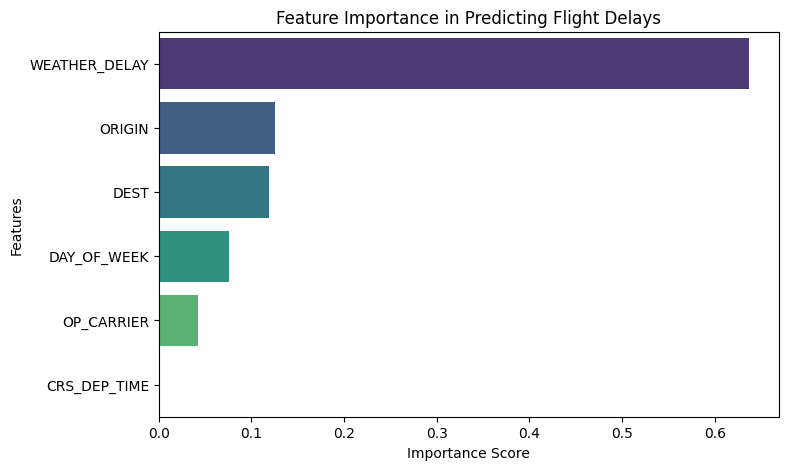

Feature importance scores:
WEATHER_DELAY    0.637310
ORIGIN           0.125761
DEST             0.119045
DAY_OF_WEEK      0.075859
OP_CARRIER       0.042025
CRS_DEP_TIME     0.000000
dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


# Assuming the dataset has a 'FL_DATE' column
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['DAY_OF_WEEK'] = df['FL_DATE'].dt.dayofweek  # Monday=0, Sunday=6

# Select relevant features for prediction
features = ['OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DAY_OF_WEEK', 'WEATHER_DELAY']
target = 'DEP_DELAY'

# Handle missing values in target and features
df[target] = df[target].fillna(0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)

# Convert categorical variables into numeric codes
for col in ['OP_CARRIER', 'ORIGIN', 'DEST']:
    df[col] = df[col].astype('category').cat.codes

# Normalize CRS_DEP_TIME to hours
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'] // 100

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} minutes")

# Feature Importance Analysis
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance in Predicting Flight Delays")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

print("Feature importance scores:")
print(feature_importance)